In [39]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 10)

In [40]:
DATA_DIR = 'total data\SKT DATA'
data_files = [os.path.join(DATA_DIR, filename) for filename in os.listdir(DATA_DIR)]
list_df = []
for filename in data_files:
    print(filename)
    list_df.append(pd.read_csv(filename))

df = pd.concat(list_df, sort = False)
df = df.reset_index(drop = True)    
df

total data\SKT DATA\test_skt.csv
total data\SKT DATA\test_skt0.csv
total data\SKT DATA\test_skt1.csv
total data\SKT DATA\test_skt10.csv
total data\SKT DATA\test_skt11.csv
total data\SKT DATA\test_skt12.csv
total data\SKT DATA\test_skt13.csv
total data\SKT DATA\test_skt14.csv
total data\SKT DATA\test_skt15.csv
total data\SKT DATA\test_skt16.csv
total data\SKT DATA\test_skt2.csv
total data\SKT DATA\test_skt3.csv
total data\SKT DATA\test_skt4.csv
total data\SKT DATA\test_skt5.csv
total data\SKT DATA\test_skt6.csv
total data\SKT DATA\test_skt7.csv
total data\SKT DATA\test_skt8.csv
total data\SKT DATA\test_skt9.csv


,id,_NAME,_NUMERICID,_VALUE,_TIMESTAMP,_QUALITY
0,1,chRX_SKT_svr.Device1.chTxCntSimulatorSKT.TxSKT...,0,59682,2020-04-04 11:26:01.563,192
1,2,chRX_SKT_svr.Device1.chTxCntSimulatorSKT.TxSKT...,0,59684,2020-04-04 11:26:00.577,192
2,3,chRX_SKT_svr.Device1.chTxCntSimulatorSKT.TxSKT...,0,59682,2020-04-04 11:26:01.563,192
3,4,chRX_SKT_svr.Device1.chTxCntSimulatorSKT.TxSKT...,0,59682,2020-04-04 11:26:01.563,192
4,5,chRX_SKT_svr.Device1.chTxCntSimulatorSKT.TxSKT...,0,59682,2020-04-04 11:26:01.563,192
...,...,...,...,...,...,...
7624565,717749,chRX_SKT_svr.Device1.chTxCntSimulatorSKT.TxSKT...,0,36560,2020-04-05 17:24:31.977,192
7624566,717750,chRX_SKT_svr.Device1.chTxCntSimulatorSKT.TxSKT...,0,36560,2020-04-05 17:24:31.977,192
7624567,717751,chRX_SKT_svr.Device1.chTxCntSimulatorSKT.TxSKT...,0,36560,2020-04-05 17:24:31.977,192
7624568,717752,chRX_SKT_svr.Device1.chTxCntSimulatorSKT.TxSKT...,0,36560,2020-04-05 17:24:31.977,192


In [41]:
df = df.drop(['_QUALITY', '_NUMERICID', 'id'], axis=1)
df['_NAME'] = df['_NAME'].apply(lambda x: x.split('Group1.')[-1]) #SKT
# df['_NAME'] = df['_NAME'].apply(lambda x: x.split('LTE.')[-1]) #KT
df = df.sort_values(by = '_NAME', ascending = True)
from datetime import datetime
df['_TIMESTAMP'] = pd.to_datetime(df['_TIMESTAMP'].astype('str'))
df['_VALUE'] = df['_VALUE'].astype('str').astype('int64')
df.head()

,_NAME,_VALUE,_TIMESTAMP
5931384,Tag1,18101,2020-04-05 12:16:57.907
7272517,Tag1,33024,2020-04-05 16:25:33.953
4849207,Tag1,6584,2020-04-05 09:05:05.840
6242584,Tag1,21215,2020-04-05 13:08:50.930
1149304,Tag1,39286,2020-04-05 18:09:48.967


In [42]:
df = df[df['_NAME'].isin(['Tag1'])]
df = df.sort_values(by = '_TIMESTAMP', ascending = True)
df = df.reset_index()
df = df.drop(['index'], axis=1)
df

,_NAME,_VALUE,_TIMESTAMP
0,Tag1,59683,2020-04-04 11:26:02.563
1,Tag1,59684,2020-04-04 11:26:03.563
2,Tag1,59685,2020-04-04 11:26:04.563
3,Tag1,59686,2020-04-04 11:26:05.563
4,Tag1,59687,2020-04-04 11:26:06.563
...,...,...,...
76300,Tag1,37771,2020-04-06 11:56:39.247
76301,Tag1,37772,2020-04-06 11:56:40.247
76302,Tag1,37773,2020-04-06 11:56:41.247
76303,Tag1,37774,2020-04-06 11:56:42.247


In [43]:
for col in df.columns:
    print(col, ':', sum(df[col].isna()), '/', len(df))

_NAME : 0 / 76305
_VALUE : 0 / 76305
_TIMESTAMP : 0 / 76305


In [44]:
for col in df.columns:
    print(col, ':', len(df[col].value_counts()), '/', len(df))

_NAME : 1 / 76305
_VALUE : 48950 / 76305
_TIMESTAMP : 76305 / 76305


In [45]:
past = 0
diff_list = []
chFile_list = []

for i in df.index:
    row_val = df.loc[i, '_VALUE']
    if row_val > past:
        val = row_val - past
        diff_list.append(val)
        past = row_val
        if val > 60:
            chFile_list.append(i)
    else:
        val = 0
        diff_list.append(val)
        past = row_val

df["diff-value"] = diff_list
# df = df.drop(0,0)

for k in chFile_list:
    df = df.drop(k, 0)
    
    
df

,_NAME,_VALUE,_TIMESTAMP,diff-value
1,Tag1,59684,2020-04-04 11:26:03.563,1
2,Tag1,59685,2020-04-04 11:26:04.563,1
3,Tag1,59686,2020-04-04 11:26:05.563,1
4,Tag1,59687,2020-04-04 11:26:06.563,1
5,Tag1,59688,2020-04-04 11:26:07.563,1
...,...,...,...,...
76300,Tag1,37771,2020-04-06 11:56:39.247,1
76301,Tag1,37772,2020-04-06 11:56:40.247,1
76302,Tag1,37773,2020-04-06 11:56:41.247,1
76303,Tag1,37774,2020-04-06 11:56:42.247,1


Text(0.5, 1.02, 'bar chart')

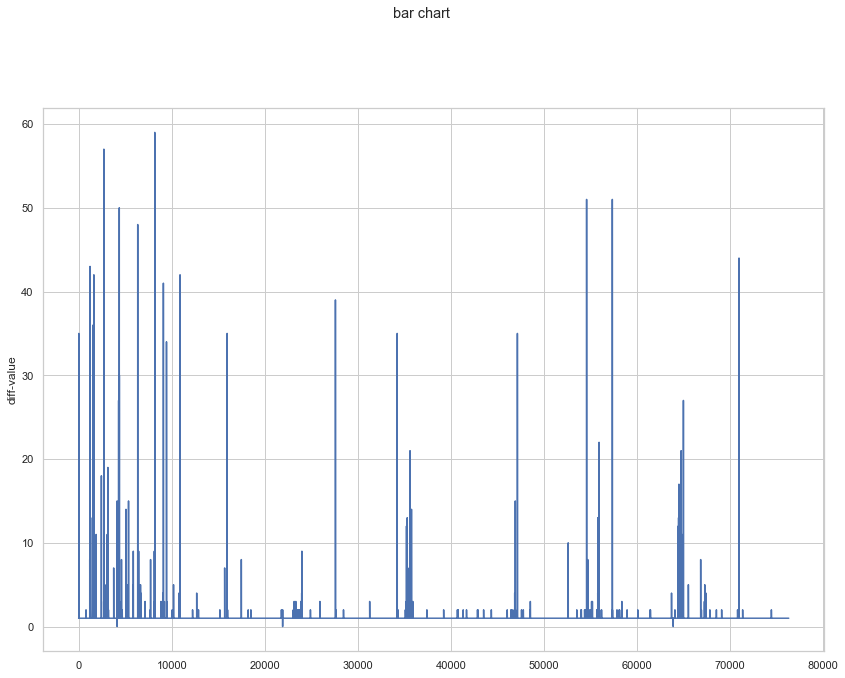

In [46]:
g = sns.lineplot(x = df.index, y = df["diff-value"], data = df)
plt.suptitle("bar chart", y=1.02)

In [57]:
sample_df = pd.DataFrame(columns = ("delay", "count"))
sample_df['count'] = df['diff-value'].value_counts()
sample_df['delay'] = sample_df.index
sample_df['delay-time'] = sample_df['delay'] * sample_df['count']
sample_df

,delay,count,delay-time
1,1,75929,75929
2,2,208,416
3,3,42,126
4,4,14,56
5,5,13,65
8,8,6,48
13,13,6,78
10,10,6,60
9,9,5,45
7,7,5,35


In [48]:
# sample_df['diff-value'][1] 
percent = sample_df['delay-time'][1] / sample_df['delay-time'].sum() * 100
print ("통신 연결성 = " + percent.astype('str') + " %")

통신 연결성 = 97.2526065015242 %


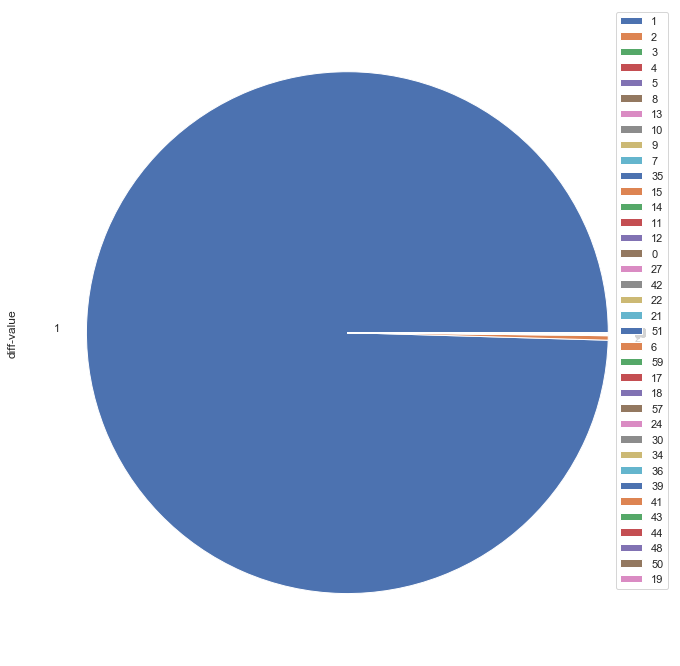

In [49]:
plot = sample_df.plot.pie(y='diff-value', figsize=(12, 12))

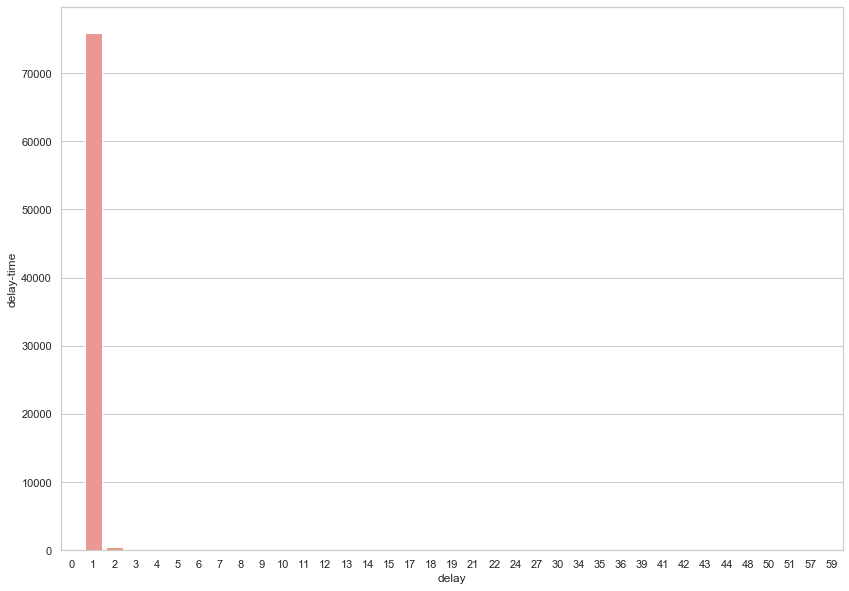

In [50]:

sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="delay", y="delay-time", data=sample_df)

Text(0.5, 1.02, 'LIne Plot')

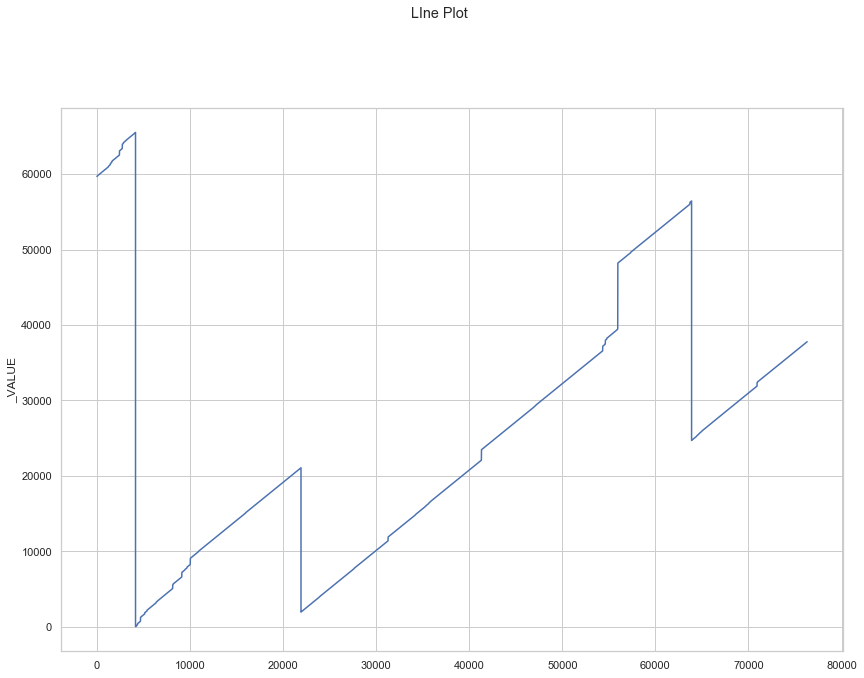

In [51]:
g = sns.lineplot(x = df.index, y = df["_VALUE"], data = df)
plt.suptitle("LIne Plot", y=1.02)

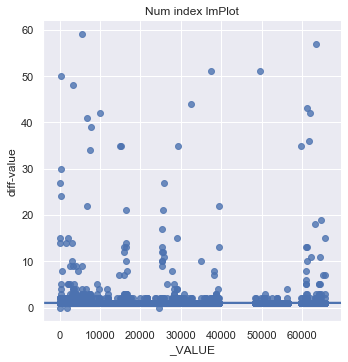

In [52]:
sns.set_style("darkgrid")
sns.lmplot(x="_VALUE", y = "diff-value", data = df)
plt.title("Num index lmPlot")
plt.show()

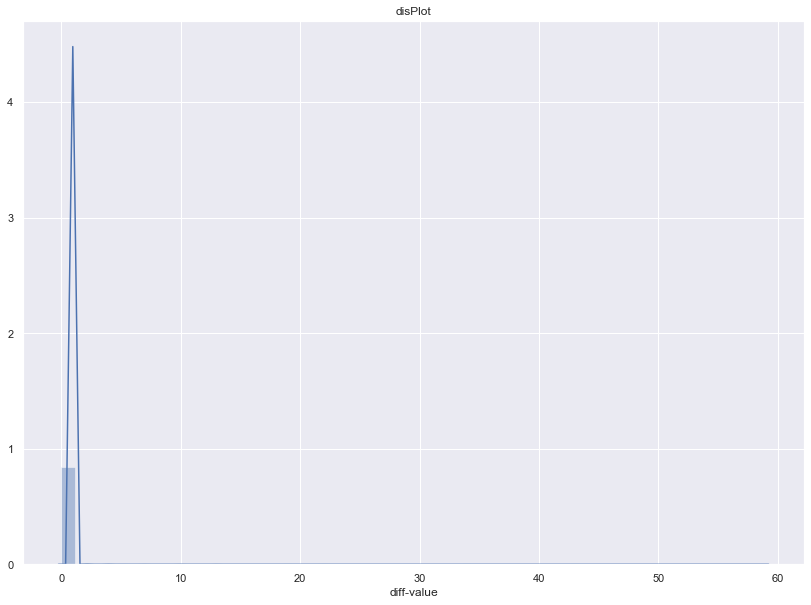

In [53]:
sns.distplot(df["diff-value"])
plt.title("disPlot")
plt.show()

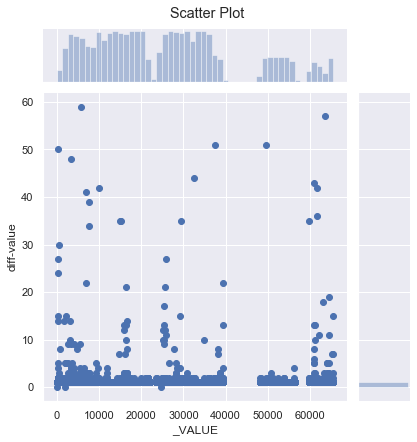

In [54]:
sns.jointplot(x="_VALUE", y="diff-value", data=df)
plt.suptitle("Scatter Plot", y=1.02)
plt.show()

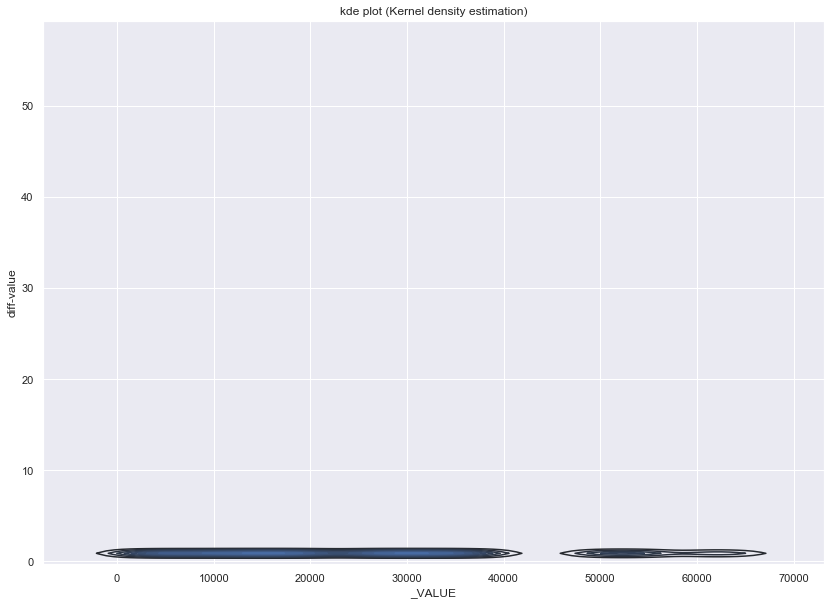

In [55]:
sns.kdeplot(df["_VALUE"], df["diff-value"])
plt.title("kde plot (Kernel density estimation)")
plt.show()